# MWC Online Phase Data Science Role

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# 1. Exploratory Data Analysis

In [2]:
df_client = pd.read_csv('data/mwc22-client_table.csv', decimal=',')
df_orders = pd.read_csv('data/mwc22-orders_table.csv', decimal=',')

In [3]:
df_client

,CLIENT ID,CLIENT_SEGMENT,AVG CONSO,AVG BASKET SIZE,RECEIVED_COMMUNICATION
0,24321771,6,67.25,201.75,0
1,24321859,2,58.33,350.00,0
2,24321880,3,46.67,112.00,0
3,24321957,2,50.00,600.00,0
4,24321962,4,10.00,120.00,0
...,...,...,...,...,...
35879,48345531,4,12.50,150.00,1
35880,48345686,3,37.50,112.50,1
35881,48365750,3,41.67,125.00,1
35882,48365861,3,62.58,125.17,1


In [4]:
df_orders

,CLIENT ID,NB PRODS,ORDER ID,FRUIT_PRODUCT
0,18070505,5,671907264,Apple
1,18070505,10,671907264,Orange
2,18070505,5,671907264,Kiwi
3,18070505,10,671907264,Pear
4,18070505,5,671907264,Cheery
...,...,...,...,...
66907,48352045,2,670065547,Pineapple
66908,48352045,1,670065547,Apple
66909,48352045,2,670065547,Watermelon
66910,48352045,1,670065547,Grape


In [5]:
df_orders_pivot = pd.pivot_table(df_orders, values='NB PRODS', index=['CLIENT ID', 'ORDER ID'], 
                                 columns=['FRUIT_PRODUCT']).reset_index()
df_orders_pivot.fillna(0, inplace=True)
df_orders_pivot

FRUIT_PRODUCT,CLIENT ID,ORDER ID,Apple,Apricot,Banana,Blueberry,Cheery,Coconut,Devil Fruit,Grape,...,Nectarine,Nuwe Fruit,Orange,Papaya,Pear,Pineapple,Plum,Pomegranate,Strawberry,Watermelon
0,18070505,671907264,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
1,18071016,675229714,0.0,0.0,0.0,0.0,15.0,0.0,0.0,5.0,...,5.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,10.0,5.0
2,18071233,673537725,3.0,0.0,0.0,3.0,9.0,0.0,3.0,0.0,...,3.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
3,18071668,667987414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,18071668,676680651,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,...,4.0,3.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17453,48341696,669547626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17454,48341727,678012260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17455,48352045,670065547,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0
17456,48365750,670187349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## 1.1. Analizar Ventas y Actividades Clientes

Text(0, 0.5, 'Number of total pieces bought')

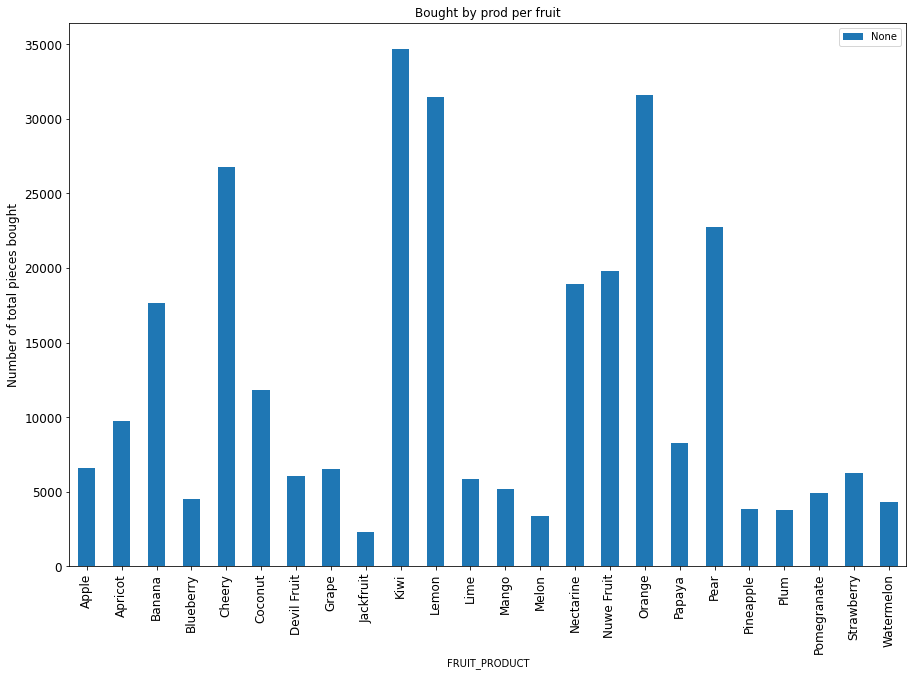

In [6]:
ax = df_orders_pivot[['Apple', 'Apricot', 'Banana', 'Blueberry',
       'Cheery', 'Coconut', 'Devil Fruit', 'Grape', 'Jackfruit', 'Kiwi',
       'Lemon', 'Lime', 'Mango', 'Melon', 'Nectarine', 'Nuwe Fruit', 'Orange',
       'Papaya', 'Pear', 'Pineapple', 'Plum', 'Pomegranate', 'Strawberry',
       'Watermelon']].sum().plot(kind='bar', title ="Bought by prod per fruit", figsize=(15, 10), legend=True, fontsize=12)
ax.set_ylabel("Number of total pieces bought", fontsize=12)

In [7]:
# Miramos el número de clientes únicos en los pedidos
total_clients = len(df_client['CLIENT ID'].unique())
clients_consumed = len(df_orders['CLIENT ID'].unique())
total_orders = len(df_orders['ORDER ID'].unique())
avg_basket_mean = df_client['AVG BASKET SIZE'].mean()
avg_consum_mean = df_client['AVG CONSO'].mean()

print('Clientes totales registrados: ', total_clients)
print('Clientes que han consumido fruta en la APP: ', clients_consumed)
print('Clientes que no han consumido: ', (total_clients - clients_consumed) / total_clients * 100, '%')
print('Ordenes totales: ', total_orders)
print('Media de tamaño cesta de clientes: ', avg_basket_mean)
print('Media de piezas de fruta consumidas por mes: ', avg_consum_mean)

Clientes totales registrados:  35884
Clientes que han consumido fruta en la APP:  14499
Clientes que no han consumido:  59.59480548433842 %
Ordenes totales:  17458
Media de tamaño cesta de clientes:  181.21860968676924
Media de piezas de fruta consumidas por mes:  64.53443679634394


Podemos exponer las siguientes conclusiones a partir de los datos recibidos respecto a las ventas:

1. Del total de 35.884 clientes registrados en NuweFruit, solo un total de 14.499 han realizado encargos de pedido de fruta. Esto supone que un total de 59.59% de clientes no han realizado pedidos de fruta.
2. Sin embargo, observamos que la media de piezas de fruta mensuales entre usuarios que han realizado pedidos es de 64.53 piezas de fruta o 0.64 'prods' entre diferentes frutas.
3. En cuanto a la media del tamaño de cesta anual, podemos suponer que tendremos meses en los que se compran más que en otros. Esto debido a la comparativa con las frutas mensuales.
3. Además, del total de clientes que lo utilizan, supondremos que, probablemente, un cliente realizará más de un solo pedido. Por ende, esto nos demuestra que hay cierta satisfacción a la hora de utilizar la aplicación por su uso reiterado.
4. En lo referente a las piezas de fruta más consumidas, en el total de pedidos podemos concluir que en el ranking sobresalen: Kiwi, Lemon. Orange, Cherry y Pear. Esto es interesante de cara a saber como serán los encargos de fruta, ya que no tiene sentido pedir de todo la misma cantidad si no se consumen por igual.

## 1.2 Evaluar el impacto de la promoción

In [8]:
clients_recived_promo = df_client.loc[df_client['RECEIVED_COMMUNICATION'] == 1]['CLIENT ID'].unique()
clients_ordered = df_orders['CLIENT ID'].unique()
intersection = clients_recived_promo[np.in1d(clients_recived_promo, clients_ordered)]

print('Total of users recived a promo code: ', len(clients_recived_promo))
print('Total of users that recieved promo code ordered: ', len(intersection))
print('Percentatge of people used: ', (len(clients_recived_promo) - len(intersection))/ len(clients_recived_promo)*100, '%')
print('Percentatge of used by people ordered', (clients_consumed - len(intersection)) / clients_consumed * 100, '%')

Total of users recived a promo code:  18229
Total of users that recieved promo code ordered:  8318
Percentatge of people used:  54.36941137747545 %
Percentatge of used by people ordered 42.63052624318919 %


Parece ser que el impacto es notable, ya que un 54,36% de las personas que reciben las promociones de los productos, las consumen. Esto se puede afirmar debido a que, previamente, observamos que un total de 14.499 usuarios realizan pedidos usando la promoción y aproximadamente a unos 4.000 les llegan pero nos las piden. Entonces, lo interesante es ver este efecto en las personas que han comprado y se puede concluir que se utilizarían las promociones en un 42% de las ocasiones. En resumen, obtenemos un buen resultado.

# 2. Predictive Model

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score

In [106]:
client_segment_predicts = pd.read_csv('data/mwc22-client_table+-+test_x.csv', decimal=',')

## 2.1 Step by Step Transformations

Primero, queremos obtener el total de frutas que ha comprado cada cliente a partir de los *orders*. Esto lo podremos realizar con el *pivot_table*, como se muestra a continuación:

In [12]:
df_fruits = pd.pivot_table(df_orders, values='NB PRODS', index=['CLIENT ID'], 
                                 columns=['FRUIT_PRODUCT']).reset_index()
df_fruits.fillna(0, inplace=True)
df_fruits

FRUIT_PRODUCT,CLIENT ID,Apple,Apricot,Banana,Blueberry,Cheery,Coconut,Devil Fruit,Grape,Jackfruit,...,Nectarine,Nuwe Fruit,Orange,Papaya,Pear,Pineapple,Plum,Pomegranate,Strawberry,Watermelon
0,18070505,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,10.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
1,18071016,0.0,0.0,0.0,0.0,15.0,0.0,0.0,5.0,0.0,...,5.0,0.000000,10.0,0.0,0.0,0.0,0.0,0.0,10.0,5.0
2,18071233,3.0,0.0,0.0,3.0,9.0,0.0,3.0,0.0,0.0,...,3.0,3.000000,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
3,18071668,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,...,5.0,3.000000,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
4,18072186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14494,48341696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14495,48341727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.000000,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14496,48352045,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0
14497,48365750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Seguidamente, nos interesará realizar un *feature engineering* para obtener el número total de pedidos que realizó cada usuario. Con ello, se nos aportará información valiosa para el estudio, ya que los segmentos pueden ser determinados por el número de comandas de un usuario u otro. Cabe destacar que nos beneficia mantener todos los clientes aunque no hayan comprado, debido a que también pueden aportar información para la clasificación con el *AVG CONSO*, *AVG BASKET SIZE* y *RECIEVED_COMMUNICATION*. 

In [87]:
temp = pd.DataFrame(df_orders.groupby(by=['CLIENT ID'])['ORDER ID'].count())
df_client_num = pd.merge(df_client, temp, on='CLIENT ID', how='left')
df_client_num

,CLIENT ID,CLIENT_SEGMENT,AVG CONSO,AVG BASKET SIZE,RECEIVED_COMMUNICATION,ORDER ID
0,24321771,6,67.25,201.75,0,1.0
1,24321859,2,58.33,350.00,0,NaN
2,24321880,3,46.67,112.00,0,1.0
3,24321957,2,50.00,600.00,0,2.0
4,24321962,4,10.00,120.00,0,NaN
...,...,...,...,...,...,...
35879,48345531,4,12.50,150.00,1,NaN
35880,48345686,3,37.50,112.50,1,NaN
35881,48365750,3,41.67,125.00,1,2.0
35882,48365861,3,62.58,125.17,1,2.0


Por último, fusionaremos los *dataframes* de la información de cliente y de las frutas compradas por cada uno. Debido a que en varios casos tendremos *Nan*, supondremos que compró 0 frutas. Esta suposición podría cambiarse por algún tipo de fórmula para que cuadre el *AVG CONSO* o *AVG BASKET SIZE*, pero debido a que no se aprecia ninguna correlación exacta (por falta de *orders* seguramente) no se puede llegar a realizar.

In [89]:
df = pd.merge(df_client_num, df_fruits,  on = "CLIENT ID", how='left')
df.fillna(0, inplace=True)
df

,CLIENT ID,CLIENT_SEGMENT,AVG CONSO,AVG BASKET SIZE,RECEIVED_COMMUNICATION,ORDER ID,Apple,Apricot,Banana,Blueberry,...,Nectarine,Nuwe Fruit,Orange,Papaya,Pear,Pineapple,Plum,Pomegranate,Strawberry,Watermelon
0,24321771,6,67.25,201.75,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24321859,2,58.33,350.00,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24321880,3,46.67,112.00,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,24321957,2,50.00,600.00,0,2.0,0.0,20.0,0.0,0.0,...,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24321962,4,10.00,120.00,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35879,48345531,4,12.50,150.00,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35880,48345686,3,37.50,112.50,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35881,48365750,3,41.67,125.00,1,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
35882,48365861,3,62.58,125.17,1,2.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Estas transformaciones se realizarán en una función para la mejora del código y tener todo recogido:

In [90]:
def transform_merge_data(df_orders, df_client):
    df_fruits = pd.pivot_table(df_orders, values='NB PRODS', index=['CLIENT ID'], 
                                 columns=['FRUIT_PRODUCT']).reset_index()
    df_fruits.fillna(0, inplace=True)
    
    temp = pd.DataFrame(df_orders.groupby(by=['CLIENT ID'])['ORDER ID'].count())
    df_client_num = pd.merge(df_client, temp, on='CLIENT ID', how='left')
    df = pd.merge(df_client_num, df_fruits,  on = "CLIENT ID", how='left')
    df.fillna(0, inplace=True)
    return df
df = transform_merge_data(df_orders, df_client)

,CLIENT ID,CLIENT_SEGMENT,AVG CONSO,AVG BASKET SIZE,RECEIVED_COMMUNICATION,ORDER ID,Apple,Apricot,Banana,Blueberry,...,Nectarine,Nuwe Fruit,Orange,Papaya,Pear,Pineapple,Plum,Pomegranate,Strawberry,Watermelon
0,24321771,6,67.25,201.75,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24321859,2,58.33,350.00,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24321880,3,46.67,112.00,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,24321957,2,50.00,600.00,0,2.0,0.0,20.0,0.0,0.0,...,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24321962,4,10.00,120.00,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35879,48345531,4,12.50,150.00,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35880,48345686,3,37.50,112.50,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35881,48365750,3,41.67,125.00,1,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
35882,48365861,3,62.58,125.17,1,2.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Ahora, al tener que realizar la predicción de segmentos, separaremos estos del *df* original. También extraeremos el *CLIENT_ID*, ya que cada fila de datos ya representa un cliente distinto y esta información es redundante. Esto se debe a que tendremos la misma cardinalidad que filas de datos.

In [93]:
y = df['CLIENT_SEGMENT']
df.drop(['CLIENT_SEGMENT', 'CLIENT ID'], axis=1, inplace=True)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)

In [95]:
rnd_forest = RandomForestClassifier()

rnd_forest.fit(X_train, y_train)

RandomForestClassifier()

In [96]:
y_pred = rnd_forest.predict(X_test)

In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.87      0.95      0.90      2147
           2       0.80      0.89      0.84      2241
           3       0.76      0.80      0.78      2749
           4       0.74      0.76      0.75      2578
           5       0.70      0.81      0.75      1073
           6       0.38      0.08      0.13      1054

    accuracy                           0.77     11842
   macro avg       0.71      0.71      0.69     11842
weighted avg       0.74      0.77      0.75     11842



Observamos que puntua especialmente bien en los primeros 5 segmentos. Cabe destacar, como curiosidad, que el último segmento  puntue flojo, ya que tampoco es la ética con menos datos. Podemos suponer que el último segmento se podría considerar de una etiqueta de miscelania, donde todos los que no encajaron en los primeros 5 grupos van destinados al 6.

In [107]:
client_segment_predicts

,CLIENT ID,AVG CONSO,AVG BASKET SIZE,RECEIVED_COMMUNICATION
0,48352078,8.33,100.00,0
1,18072186,93.42,186.83,1
2,48352246,45.83,137.50,0
3,18070621,16.67,200.00,1
4,48352262,13.33,160.00,0
5,48359553,16.67,200.00,0
6,18071647,8.33,100.00,1
7,48359574,54.17,162.50,0
8,48359627,26.67,106.67,0
9,18070505,166.67,333.33,1


In [108]:
client_segment_predicts_transformed = transform_merge_data(df_orders, client_segment_predicts)
client_segment_predicts_transformed.drop(['CLIENT ID'], axis=1, inplace=True)
client_segment_predicts_transformed

,AVG CONSO,AVG BASKET SIZE,RECEIVED_COMMUNICATION,ORDER ID,Apple,Apricot,Banana,Blueberry,Cheery,Coconut,...,Nectarine,Nuwe Fruit,Orange,Papaya,Pear,Pineapple,Plum,Pomegranate,Strawberry,Watermelon
0,8.33,100.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,93.42,186.83,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
2,45.83,137.50,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16.67,200.00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13.33,160.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,16.67,200.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,8.33,100.00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,54.17,162.50,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,26.67,106.67,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,166.67,333.33,1,5.0,5.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,10.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0


In [98]:
# Entrenamos con todo el conjunto de datos
rnd_forest = RandomForestClassifier()

rnd_forest.fit(df, y)

RandomForestClassifier()

In [109]:
y_pred = rnd_forest.predict(client_segment_predicts_transformed)

In [110]:
y_pred

array([4, 1, 3, 4, 4, 4, 4, 3, 4, 2, 1, 1, 2, 5, 1, 3, 3, 1, 1],
      dtype=int64)

In [112]:
result = pd.DataFrame({'CLIENT ID' : client_segment_predicts['CLIENT ID'], 'CLIENT_SEGMENT': y_pred})

In [113]:
result

,CLIENT ID,CLIENT_SEGMENT
0,48352078,4
1,18072186,1
2,48352246,3
3,18070621,4
4,48352262,4
5,48359553,4
6,18071647,4
7,48359574,3
8,48359627,4
9,18070505,2


In [114]:
result.to_csv('predictions.csv', index=False)